<a href="https://colab.research.google.com/github/thangtb172/facerecognition/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
# %cd /content/drive/My Drive/Face_final/face-aivi/mysrc
# !ls

In [175]:
 # !pip install mxnet-cu101

In [176]:
"""
import sys
sys.path.append('../models/insightface/deploy') 
import face_model
import argparse
import cv2
import sys
import numpy as np
import os
from tqdm import *
import imgaug as ia
from imgaug import augmenters as iaa
"""


"\nimport sys\nsys.path.append('../models/insightface/deploy') \nimport face_model\nimport argparse\nimport cv2\nimport sys\nimport numpy as np\nimport os\nfrom tqdm import *\nimport imgaug as ia\nfrom imgaug import augmenters as iaa\n"

In [177]:
# generate_insightface
# !python n_generate_insightface_embedding.py --image-size 112,112 --model ../models/insightface/models/model-r100-ii/model,0 --gpu 0

In [178]:
%cd /content/drive/My Drive/Projects/Facerecognition/mysrc/model1_insightface
!ls

/content/drive/My Drive/Projects/Facerecognition/mysrc/model1_insightface
clr_callback.py		  newweights	      train_data.npy
facemodel.pkl		  nruburn_1.png       train_final.csv
lebong95_4.png		  prepare.py	      training_log_test.txt
manttien_9.png		  __pycache__	      training_log.txt
model.hdf5		  test_data.npy       train.py
model.pt		  test_final.csv      weights
my_checkpoint.pth.tar	  test_flip_data.npy  withdanh_0.png
newtraining_log_test.txt  test.png
newtraining_log.txt	  train_aug_data.npy


In [179]:
!pip install tensorflow==1.7

In [180]:
!pip install face_alignment

In [181]:
!pip install mxnet-cu101

In [182]:
import tensorflow as tf
tf.__version__

'1.7.0'

In [183]:
import sys
sys.path.append('../../models/facenet/src') 
sys.path.append('../../models/insightface/deploy') 

In [184]:

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import face_model
import argparse
import cv2
import sys

from tqdm import *
from skimage import io
import imgaug as ia
from imgaug import augmenters as iaa
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import argparse
import facenet
import os
import sys
import math
import pickle
import align.detect_face
import numpy as np
import cv2
import collections
#Splitting preprocessed reviews into train,cross validation and test
import numpy as np
import pandas as pd
import math
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
import random
import threading
from random import randint
from google.colab.patches import cv2_imshow
import pickle
from sklearn.svm import SVC

import torch
from torch import nn,functional 
from torch.autograd import Variable
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as nnf


x_train = np.load('train_data.npy')
x_test = np.load('test_data.npy')
train_df = pd.read_csv('train_final.csv')
test_df = pd.read_csv('test_final.csv')
print(len(x_train))
print(train_df.shape)
print(len(x_test))
print(test_df.shape)

9074
(9074, 2)
2278
(2278, 2)


In [185]:
train_df

,id,labels
0,singerdongnhi_484.jpg,singerdongnhi
1,singerdongnhi_384.jpg,singerdongnhi
2,singerdongnhi_538.jpg,singerdongnhi
3,singerdongnhi_260.jpg,singerdongnhi
4,singerdongnhi_420.jpg,singerdongnhi
...,...,...
9069,puka_nguyen_715.jpg,puka_nguyen
9070,puka_nguyen_442.jpg,puka_nguyen
9071,puka_nguyen_275.jpg,puka_nguyen
9072,puka_nguyen_144.jpg,puka_nguyen


In [186]:
test_df

,id,labels
0,wonhari_769.jpg,wonhari
1,wonhari_1187.jpg,wonhari
2,wonhari_868.jpg,wonhari
3,wonhari_956.jpg,wonhari
4,wonhari_295.jpg,wonhari
...,...,...
2273,cas.naf_0.jpg,cas.naf
2274,cas.naf_95.jpg,cas.naf
2275,cas.naf_232.jpg,cas.naf
2276,cas.naf_56.jpg,cas.naf


In [187]:
from sklearn.preprocessing import LabelEncoder

unique_train_labels = np.unique(train_df['labels'].tolist())
unique_test_labels = np.unique(test_df['labels'].tolist())
train_label_encoderd = LabelEncoder().fit_transform(train_df['labels'].tolist())  
test_label_encoderd = LabelEncoder().fit_transform(test_df['labels'].tolist())  
print(train_label_encoderd[0:10])
print(test_label_encoderd[0:10])




[44 44 44 44 44 44 44 44 44 44]
[57 57 57 57 57 57 57 57 57 57]


In [188]:
print(unique_train_labels[0:10])
print(unique_test_labels[0:10])

['26thang6' '__thuyb' 'baothy.tran' 'bap.ohsusu' 'btram.ryy' 'cas.naf'
 'chanchan.0411' 'cloud.dokhanhvan' 'dieu_nhiii' 'dizvuonggg']
['26thang6' '__thuyb' 'baothy.tran' 'bap.ohsusu' 'btram.ryy' 'cas.naf'
 'chanchan.0411' 'cloud.dokhanhvan' 'dieu_nhiii' 'dizvuonggg']


In [189]:
# check_class
for labels in unique_train_labels:
  if labels not in unique_test_labels:
    print(i)

In [190]:

# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_cv, y_train, y_cv = train_test_split(x_train,
                                                  train_label_encoderd,
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_cv), len(y_cv)

(7259, 7259, 1815, 1815)

In [191]:
y_train

array([29, 34, 18, ..., 17,  5, 45])

In [192]:
tf.__version__

'1.7.0'

In [193]:
CLASSIFIER_PATH = 'facemodel.pkl'
if os.path.isfile(CLASSIFIER_PATH):
  with open(CLASSIFIER_PATH, 'rb') as file:
      svm_model, class_names = pickle.load(file)
  print("Custom Classifier, Successfully loaded")
else:
  svm_model = SVC(kernel='linear', probability=True)
  model.fit(X_train, y_train)
  classifier_filename_exp = 'facemodel.pkl'
  with open(classifier_filename_exp, 'wb') as outfile:
              pickle.dump((svm_model, unique_test_labels), outfile)
  print('Saved classifier model to file "%s"' % classifier_filename_exp)

Custom Classifier, Successfully loaded


In [194]:

X_train_torch = torch.from_numpy(x_train)
X_torch_torch = torch.from_numpy(x_test)

y_train_torch = torch.from_numpy(train_label_encoderd).type(torch.LongTensor) 
y_test_torch = torch.from_numpy(test_label_encoderd).type(torch.LongTensor)

train_data_torch = torch.utils.data.TensorDataset(X_train_torch,y_train_torch)
test_data_torch = torch.utils.data.TensorDataset(X_torch_torch,y_test_torch)


train_loader = torch.utils.data.DataLoader(train_data_torch, batch_size = 32, shuffle = False)
test_loader = torch.utils.data.DataLoader(test_data_torch, batch_size = 32, shuffle = False)
# Build model
input_size = x_train.shape[1]
NUMBER_OF_CLASSES = len(unique_train_labels)
torch_model = nn.Sequential(nn.Linear(input_size,2048),
                      nn.ReLU(),
                      nn.Dropout(0.25),
                      nn.Linear(2048,NUMBER_OF_CLASSES))
# No need for final softmax!
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
#torch_model.to(device) # using device 
# Loss and opimizer
critersion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(torch_model.parameters(),lr=0.001)
def save_checkpoint(state, filename="my_checkpoint.pth.tar"):
  print("=> Saving checkpoint")
  torch.save(state, filename)

def load_checkpoint(checkpoint, torch_model, optimizer):
    print("=> Loading checkpoint")
    torch_model.load_state_dict(checkpoint["state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer"])

if not os.path.isfile('my_checkpoint.pth.tar'):
# Train the model
  n_epochs = 10

  # Stuff to store
  train_losses = np.zeros(n_epochs)
  test_losses = np.zeros(n_epochs)

  for epoch in range(n_epochs):
      train_loss = []
      for inputs,targets in train_loader:
          #move data to GPU
          #inputs, targets = inputs.to(device), targets.to(device)
        
          # reshape the input
          outputs = torch_model(inputs)
          loss = critersion(outputs, targets)
          #zero the parameter gradients
          optimizer.zero_grad()

          #forward pass
          loss.backward()
          optimizer.step()

          train_loss.append(loss.item())

      # Get train loss and test loss
      train_loss = np.mean(train_loss) # a little misleading

      test_loss = []

      for inputs, targets in test_loader:
            #inputs, targets = inputs.to(device),targets.to(device)
            outputs = torch_model(inputs)
            loss = critersion(outputs,targets)
            test_loss.append(loss.item())
      test_loss = np.mean(test_loss)

      # Save losses
      train_losses[epoch] = train_loss
      test_losses[epoch] = test_loss
    
      print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss: 4f}, Test Loss: {test_loss: 4f}')
  # Plot the train loss and test loss per iteration
  plt.plot(train_losses, label='train loss')
  plt.plot(test_losses, label='test loss')
  plt.legend()
  plt.show()
  checkpoint = {"state_dict": torch_model.state_dict(), "optimizer": optimizer.state_dict()}
  # Try save checkpoint
  save_checkpoint(checkpoint)
  
load_checkpoint(torch.load("my_checkpoint.pth.tar"), torch_model, optimizer)

def get_accuracy(data):
    n_correct = 0
    n_total = 0
    for inputs,targets in data:
      #move to GPU
      #inputs, targets  = inputs.to(device), targets.to(device)
      #reshape the input
    

      outputs = torch_model(inputs)
      _,predictions = torch.max(outputs,1)

      n_correct += (predictions == targets).sum().item()
      n_total += targets.shape[0]
    
    return n_correct/n_total
train_acc = get_accuracy(train_loader)
test_acc = get_accuracy(test_loader)
print("Train accuracy: ",train_acc,"Test accuracy: ",test_acc)



cuda:0
=> Loading checkpoint
Train accuracy:  0.9901917566674013 Test accuracy:  0.9148375768217735


In [247]:
def get_proba_pytorch(data):

    predictions = []
    for inputs,targets in data:
      #move to GPU
      #inputs, targets  = inputs.to(device), targets.to(device)         
      output = torch_model(inputs)
      prediction = nnf.softmax(output, dim=1)
      predictions.extend(prediction.detach().numpy())
    predictions = np.array(predictions)
    best_class_indices = np.argmax(predictions, axis=1)
    #best_class_probabilities = np.array([ max(i) for i in predictions])
    best_class_probabilities = predictions[np.arange(len(best_class_indices)), best_class_indices]
    return predictions,best_class_indices,best_class_probabilities


In [196]:
def get_proba_svm(data):

    predictions = svm_model.predict_proba(data)
    best_class_indices = np.argmax(predictions, axis=1)
    best_class_probabilities = predictions[np.arange(len(best_class_indices)), best_class_indices]
    return predictions,best_class_indices,best_class_probabilities


In [248]:
predictions,best_class_indices,best_class_probabilities = get_proba_pytorch(test_loader)

In [198]:
#predictions,best_class_indices,best_class_probabilities = get_proba_svm(x_test)

In [249]:
def eval(predictions,best_class_indices,best_class_probabilities):
  count = 0
  for i in range(len(best_class_indices)):
      pre = unique_test_labels[best_class_indices[i]]
      true = unique_test_labels[test_label_encoderd[i]] 
      isTrue = pre == true
    
      if not isTrue:
        print('%4d P:%s: T:%s Best: %.3f R: %s' % (i, pre, true,best_class_probabilities[i],isTrue))
        count += 1
      
  accuracy = np.mean(np.equal(best_class_indices, test_label_encoderd))
  print('Accuracy: %.3f' % accuracy)
  print(count)


In [250]:
eval(predictions,best_class_indices,best_class_probabilities)

   0 P:phuongngabui_: T:wonhari Best: 0.334 R: False
   5 P:sam.ng_official: T:wonhari Best: 0.458 R: False
  11 P:kyduyen1311: T:wonhari Best: 0.110 R: False
  12 P:toctien1305: T:wonhari Best: 0.158 R: False
  13 P:toctien1305: T:wonhari Best: 0.479 R: False
  28 P:nhunggumiho: T:wonhari Best: 0.177 R: False
  35 P:nhunggumiho: T:wonhari Best: 0.646 R: False
  36 P:tranggieee: T:wonhari Best: 0.264 R: False
  37 P:lebong95: T:wonhari Best: 0.151 R: False
  50 P:only_meoo: T:wonhari Best: 0.586 R: False
  73 P:jennyyen249: T:uyenpu1510 Best: 0.635 R: False
  74 P:phuongngabui_: T:uyenpu1510 Best: 0.206 R: False
  79 P:wonhari: T:uyenpu1510 Best: 0.187 R: False
  80 P:wonhari: T:uyenpu1510 Best: 0.336 R: False
  82 P:tranggieee: T:uyenpu1510 Best: 0.370 R: False
 116 P:kyduyen1311: T:hoang.yennn_ Best: 0.220 R: False
 129 P:tranggieee: T:duyenn.hipp Best: 0.181 R: False
 131 P:ngoctrinh89: T:duyenn.hipp Best: 0.513 R: False
 137 P:sithanh: T:duyenn.hipp Best: 0.505 R: False
 140 P:tran

In [201]:
unique_test_labels[np.argmax(predictions[0])]

'phuongngabui_'

In [202]:
# add path images
test_images = []
for id,row in test_df.iterrows():
    label = row['labels']
    fileName = row['id']
    path = '../../datasets/final_data/%s/%s'%(label,fileName)
    test_images.append(path)
print(test_images[0:10])


['../../datasets/final_data/wonhari/wonhari_769.jpg', '../../datasets/final_data/wonhari/wonhari_1187.jpg', '../../datasets/final_data/wonhari/wonhari_868.jpg', '../../datasets/final_data/wonhari/wonhari_956.jpg', '../../datasets/final_data/wonhari/wonhari_295.jpg', '../../datasets/final_data/wonhari/wonhari_1149.jpg', '../../datasets/final_data/wonhari/wonhari_1134.jpg', '../../datasets/final_data/wonhari/wonhari_418.jpg', '../../datasets/final_data/wonhari/wonhari_80.jpg', '../../datasets/final_data/wonhari/wonhari_1322.jpg']


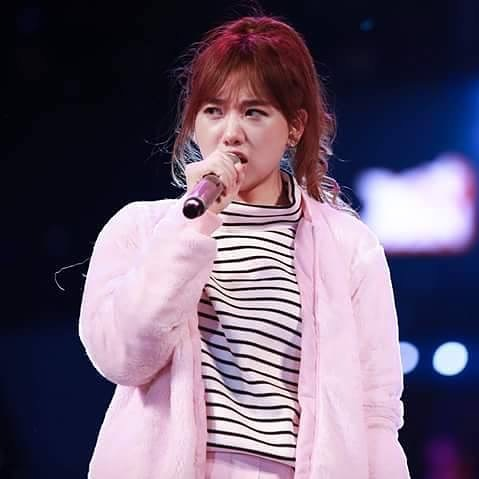

In [203]:
# show image
image = cv2.imread(test_images[1])
cv2_imshow(image)

In [204]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_test_labels[np.argmax(prediction_probabilities)]


In [205]:
get_pred_label(predictions[1000])


'imkhangan'

In [206]:
test_labels = test_df['labels'].tolist()

In [251]:

def plot_pred(prediction_probabilities, labels, images, n=0):
  """
  View the prediction, ground truth and image for sample n
  """
  
  # from pylab import rcParams
  # rcParams['figure.figsize'] = 5, 10
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], io.imread(images[n])
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

In [257]:
len(test_images)

2278

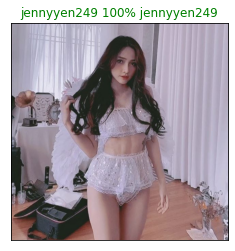

In [256]:
plot_pred(predictions,test_labels,test_images,269)

In [210]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_test_labels[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

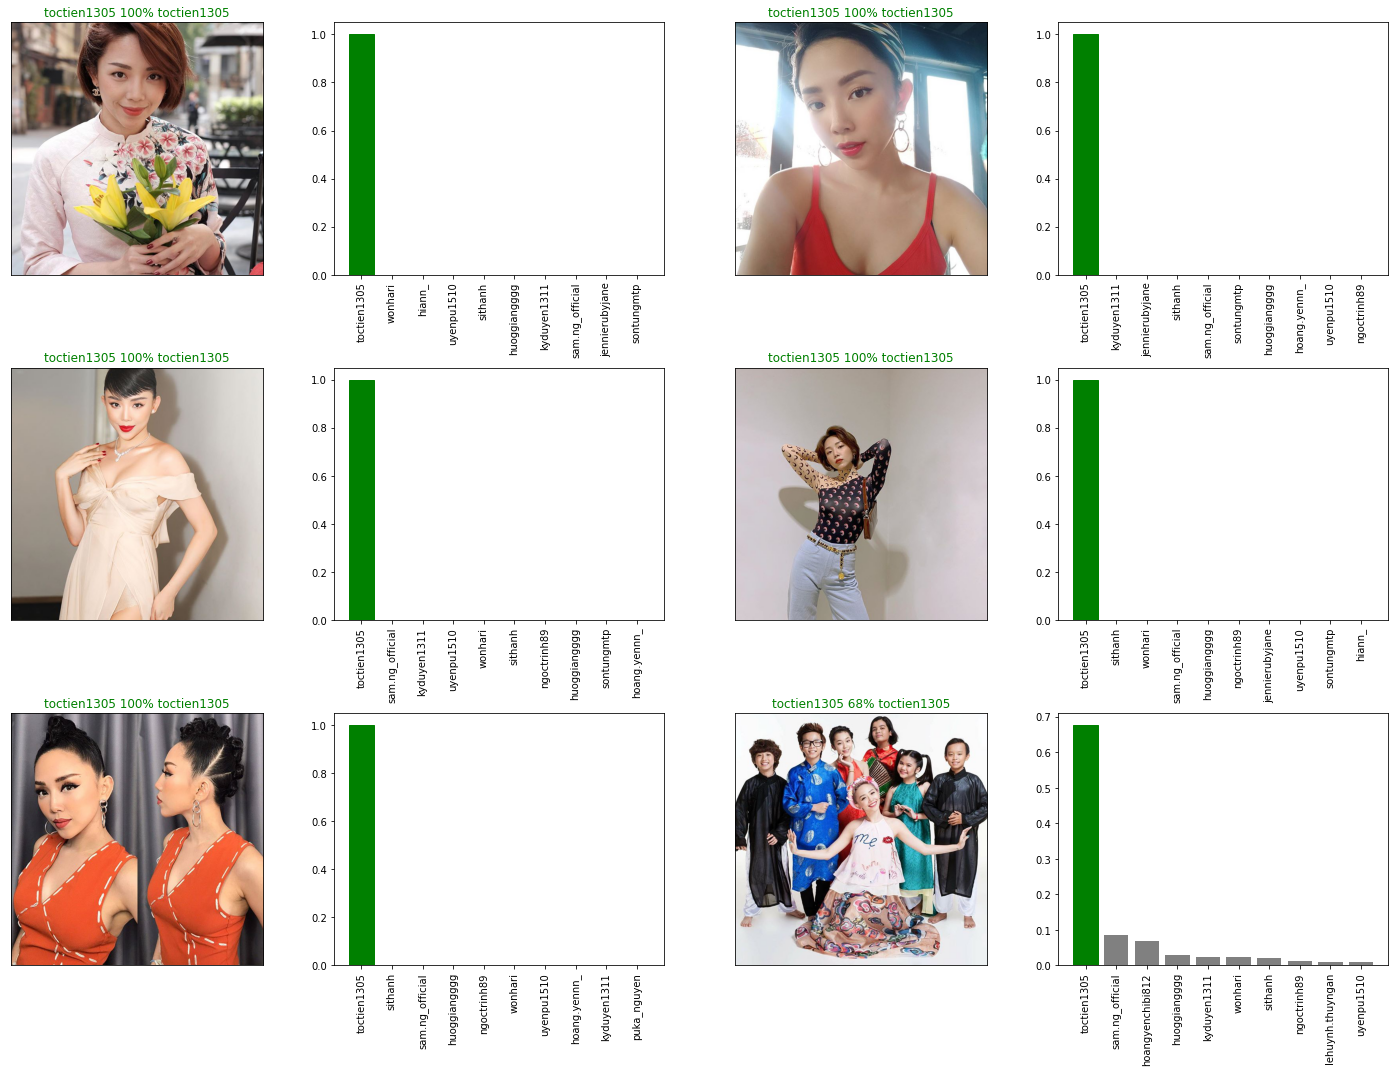

In [258]:
# Let's check out a few predictions and their different values
i_multiplier = randint(0,len(test_df))
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=test_labels,
            images=test_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=test_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [212]:
def alignment(cv_img, dst, dst_w, dst_h):
    if dst_w == 96 and dst_h == 112:
        src = np.array([
            [30.2946, 51.6963],
            [65.5318, 51.5014],
            [48.0252, 71.7366],
            [33.5493, 92.3655],
            [62.7299, 92.2041]], dtype=np.float32)
    elif dst_w == 112 and dst_h == 112:
        src = np.array([
            [38.2946, 51.6963],
            [73.5318, 51.5014],
            [56.0252, 71.7366],
            [41.5493, 92.3655],
            [70.7299, 92.2041]], dtype=np.float32)
    elif dst_w == 150 and dst_h == 150:
        src = np.array([
            [51.287415, 69.23612],
            [98.48009, 68.97509],
            [75.03375, 96.075806],
            [55.646385, 123.7038],
            [94.72754, 123.48763]], dtype=np.float32)
    elif dst_w == 160 and dst_h == 160:
        src = np.array([
            [54.706573, 73.85186],
            [105.045425, 73.573425],
            [80.036, 102.48086],
            [59.356144, 131.95071],
            [101.04271, 131.72014]], dtype=np.float32)
    elif dst_w == 224 and dst_h == 224:
        src = np.array([
            [76.589195, 103.3926],
            [147.0636, 103.0028],
            [112.0504, 143.4732],
            [83.098595, 184.731],
            [141.4598, 184.4082]], dtype=np.float32)
    else:
        return None
    tform = trans.SimilarityTransform()
    tform.estimate(dst, src)
    M = tform.params[0:2, :]
    face_img = cv2.warpAffine(cv_img, M, (dst_w, dst_h), borderValue=0.0)
    return face_img

In [213]:
!pip install face_alignment

In [214]:
import os
from tqdm import *
from skimage import io
from shutil import copyfile
import cv2
import numpy as np
import imgaug as ia
from imgaug import augmenters as iaa
from skimage import transform as trans
from shutil import copyfile
import face_alignment
def align_face(image_path):
        fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False, device='cuda:0')
        image = io.imread(image_path)
        landmarks = fa.get_landmarks(image)
        check = False        
        if landmarks is None:
            for sigma in np.linspace(0.0, 3.0, num=11).tolist():
                seq = iaa.GaussianBlur(sigma)
                image_aug = seq.augment_image(image)
                landmarks = fa.get_landmarks(image_aug)
                if landmarks is not None:
                    print('sigma:', sigma)
                    points = landmarks[0]
                    p1 = np.mean(points[36:42, :], axis=0)
                    p2 = np.mean(points[42:48, :], axis=0)
                    p3 = points[33, :]
                    p4 = points[48, :]
                    p5 = points[54, :]

                    if np.mean([p1[1], p2[1]]) < p3[1] \
                            and p3[1] < np.mean([p4[1], p5[1]]) \
                            and np.min([p4[1], p5[1]]) > np.max([p1[1], p2[1]]) \
                            and np.min([p1[1], p2[1]]) < p3[1] \
                            and p3[1] < np.max([p4[1], p5[1]]):

                        dst = np.array(
                            [p1, p2, p3, p4, p5], dtype=np.float32)
                        cv_img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

                        face_112x112 = alignment(cv_img, dst, 112, 112)
                        return face_112x112

        else:
            points = landmarks[0]
            p1 = np.mean(points[36:42, :], axis=0)
            p2 = np.mean(points[42:48, :], axis=0)
            p3 = points[33, :]
            p4 = points[48, :]
            p5 = points[54, :]

            dst = np.array([p1, p2, p3, p4, p5], dtype=np.float32)
            cv_img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            face_112x112 = alignment(cv_img, dst, 112, 112)
            return face_112x112
          

            



In [215]:
class Options():
   def __init__(self,image_size = '112,112',model = '../../models/insightface/models/model-r100-ii/model,0', ga_model = '', gpu = 0, det = 0, flip = 0,threshold = 1.24):          
      self.image_size = image_size
      self.model = model
      self.ga_model = ga_model
      self.gpu = gpu
      self.det = det
      self.flip = flip
      self.threshold = threshold

In [216]:

def faceRecognition(images,model,n=0,isTorch=False,isLocal = False):
     
    # Cai dat cac tham so can thiet
    MINSIZE = 20
    THRESHOLD = [0.6, 0.7, 0.7]
    FACTOR = 0.709
    IMAGE_SIZE = 182
    INPUT_IMAGE_SIZE = 112
    #FACENET_MODEL_PATH = '../../models/facenet/models/20180402-114759/20180402-114759.pb'
    args = Options()
    insightface_model = face_model.FaceModel(args)
    with tf.Graph().as_default():

        # Cai dat GPU neu co
        gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.6)
        sess = tf.Session(config=tf.ConfigProto(
            gpu_options=gpu_options, log_device_placement=False))

        with sess.as_default():

            # Load model MTCNN phat hien khuon mat
            print('Loading feature extraction model')
            # facenet.load_model(FACENET_MODEL_PATH)

            # # Lay tensor input va output
            # images_placeholder = tf.get_default_graph().get_tensor_by_name("input:0")
            # embeddings = tf.get_default_graph().get_tensor_by_name("embeddings:0")
            # phase_train_placeholder = tf.get_default_graph().get_tensor_by_name("phase_train:0")
            # embedding_size = embeddings.get_shape()[1]
            
            pnet, rnet, onet = align.detect_face.create_mtcnn(
                sess, "../../models/facenet/src/align")
            print("Loading successful")
            img_align = align_face(images[n])
            img = cv2.imread(images[n])
            bounding_boxes, _ = align.detect_face.detect_face(
                    img, MINSIZE, pnet, rnet, onet, THRESHOLD, FACTOR)
            faces_found = bounding_boxes.shape[0]
            if faces_found > 0:
                  det = bounding_boxes[:, 0:4]
                  bb = np.zeros((faces_found, 4), dtype=np.int32)
                  for i in range(faces_found):
                      bb[i][0] = det[i][0]
                      bb[i][1] = det[i][1]
                      bb[i][2] = det[i][2]
                      bb[i][3] = det[i][3]
                 
                  text_x = bb[i][0]
                  text_y = bb[i][3] + 20                
                            
                  cropped = img[bb[i][1]:bb[i][3], bb[i][0]:bb[i][2], :]
                              
                  scaled = cv2.resize(cropped, (INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE),
                                      interpolation=cv2.INTER_CUBIC)
                  img_org = cv2.cvtColor(img_align, cv2.COLOR_BGR2RGB)
                  img_org = np.transpose(img_org, (2,0,1))
                  embed = insightface_model.get_feature(img_org).reshape(1,512)
                  

                  cv2.rectangle(img, (bb[i][0], bb[i][1]), (bb[i][2], bb[i][3]), (0, 255, 0), 2)
                  #cv2.imwrite('test.png',scaled)
                  if isTorch:
                      embed = torch.from_numpy(embed)
                      output = model(embed)
                      prediction = nnf.softmax(output, dim=1)
                      best_name = class_names[torch.argmax(prediction[0])]
                      best_class_probabilitie =  torch.max(prediction,1).values.item()
                  else:
                      prediction = model.predict_proba(embed)
                      best_name = class_names[np.argmax(prediction[0])]
                      best_class_probabilitie =  max(prediction[0])

                  if best_class_probabilitie > 0.5:
                          name = best_name
                  else:
                          name = "Unknown"

                  
                  print("Name: {}, Probability: {}".format( best_name,best_class_probabilitie))
                  if not isLocal:
                    print("True Name: ",test_labels[n])

                  if best_class_probabilitie > 0.5:
                          name = best_name
                  else:
                          name = "Unknown"
                  cv2.putText(img, name, (text_x, text_y), cv2.FONT_HERSHEY_COMPLEX_SMALL,
                                      1, (0, 255, 0), thickness=1, lineType=2)
                  cv2.putText(img, str(round(best_class_probabilitie, 3)), (text_x, text_y + 17),
                                      cv2.FONT_HERSHEY_COMPLEX_SMALL,
                                      1, (0, 255, 0), thickness=1, lineType=2)            
                  print(best_name)
                  cv2_imshow(img_align)
                  cv2_imshow(scaled)
                  cv2_imshow(img)
              
                  return embed
                  
files = os.listdir()
png_files = list(filter(lambda x: x[-4:] == '.png',files))




In [217]:
n = randint(0,len(test_df))
n

1810

loading ../../models/insightface/models/model-r100-ii/model 0
Loading feature extraction model
Loading successful
Name: nruburn, Probability: 0.7249614676054738
True Name:  nruburn
nruburn


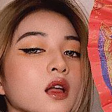

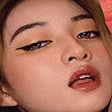

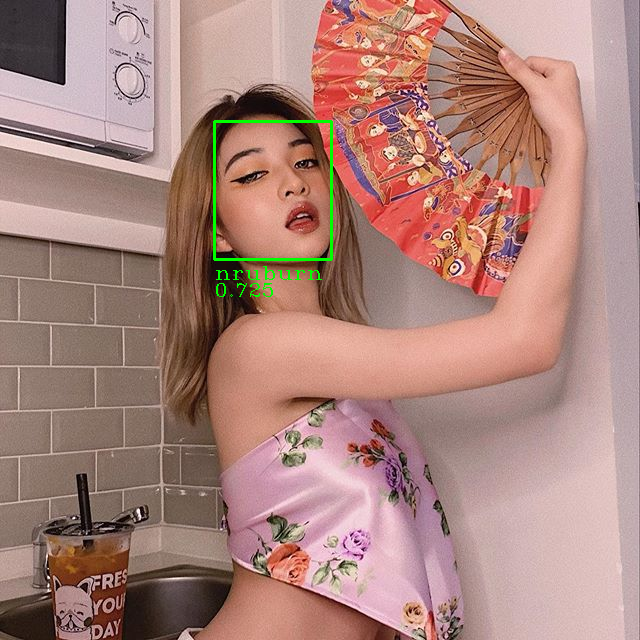

In [218]:
embed = faceRecognition(test_images,svm_model,n,isTorch=False)

loading ../../models/insightface/models/model-r100-ii/model 0
Loading feature extraction model
Loading successful
Name: nruburn, Probability: 0.9984455704689026
True Name:  nruburn
nruburn


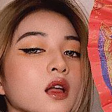

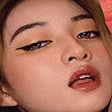

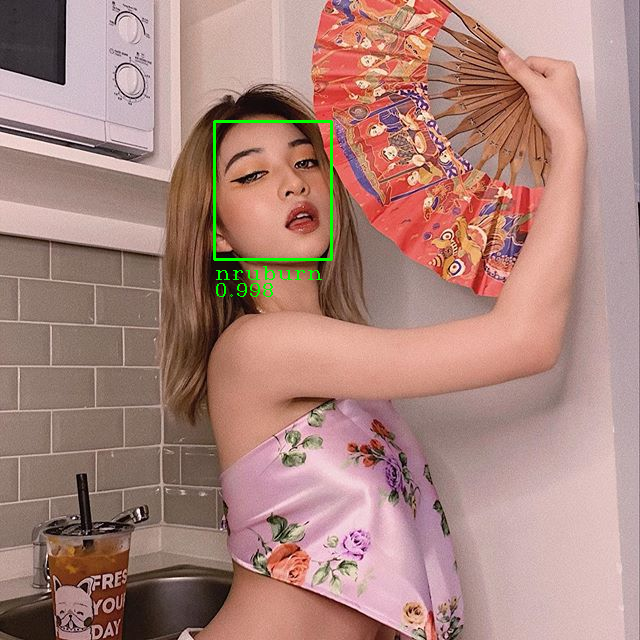

In [219]:
embed = faceRecognition(test_images,torch_model,n,isTorch=True)